# Example

## 套件導入

In [1]:
# 数据处理
import pandas as pd
import numpy as np

# 绘图
import seaborn as sns
import matplotlib.pyplot as plt
# 因子分析
from factor_analyzer import FactorAnalyzer

## 數據探索

In [2]:
df = pd.read_csv("bfi.csv", index_col=0).reset_index(drop=True)
df

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,...,NaN,1.0,6.0,1,6.0,6.0,1.0,1,3.0,19
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,...,3.0,3.0,6.0,3,5.0,4.0,2.0,1,4.0,27
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


### 數據預處理

In [3]:
#  去掉无效字段
df.drop(["gender","education","age"],axis=1,inplace=True)
# 去掉空值
df.dropna(inplace=True)

In [4]:
df

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,...,5.0,6.0,5.0,5.0,6.0,6.0,1,4.0,5.0,2.0
2794,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,3.0,5.0,...,4.0,5.0,3.0,5.0,2.0,6.0,1,5.0,6.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


### 充分性檢測

#### Bartlett's球狀檢驗

檢驗總體變量的相關矩陣是否是單位陣（相關係數矩陣對角線的所有元素均為1,所有非對角線上的元素均為零）；即檢驗各個變量是否各自獨立。

如果不是單位矩陣，說明原變量之間存在相關性，可以進行因子分子；反之，原變量之間不存在相關性，數據不適合進行主成分分析

In [5]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18170.96635086956, 0.0)

我們發現統計量p-value的值為0，表明變量的相關矩陣不是單位矩陣，即各個變量之間是存在一定的相關性，我們就可以進行因子分析

#### KMO檢驗

檢查變量間的相關性和偏相關性，取值在0-1之間；KOM統計量越接近1，變量間的相關性越強，偏相關性越弱，因子分析的效果越好。

通常取值從0.6開始進行因子分析

In [6]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_all

array([0.75391928, 0.8363196 , 0.87010963, 0.87795367, 0.90348747,
       0.84325413, 0.79568263, 0.85186857, 0.82647206, 0.86401687,
       0.83801873, 0.88380544, 0.89697008, 0.87731273, 0.89332158,
       0.77933902, 0.78025018, 0.86229919, 0.88518467, 0.86014155,
       0.85858672, 0.78019798, 0.84434957, 0.77003158, 0.76144469])

In [7]:
kmo_model

0.848539722194925

通常取值從0.6開始進行因子分析

### 選擇因子個數

在數據說明中，我們已經知道了這些變量是和5個隱藏的因子相關。但是很多情況下，我們並不知道這個個數，需要自己進行探索

#### 特徵值和特徵向量

In [8]:
faa = FactorAnalyzer(25,rotation=None)
faa.fit(df)

# 得到特征值ev、特征向量v
ev,v=faa.get_eigenvalues()

In [9]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

In [10]:
v

array([ 4.73899341e+00,  2.39633009e+00,  1.70232176e+00,  1.35374983e+00,
        1.10683548e+00,  6.19258379e-01,  3.88519722e-01,  3.46797171e-01,
        2.43243995e-01,  2.34526074e-01,  2.02724055e-01,  1.60041981e-01,
        1.29649425e-01,  1.17501563e-01,  9.87727780e-02,  9.09908001e-02,
        7.66931691e-02,  5.44449081e-02,  4.14916443e-02,  2.23919088e-02,
        1.44232013e-02,  1.14479462e-02,  3.53863435e-03,  1.07866497e-03,
       -1.63735381e-06])

#### 可視化展示

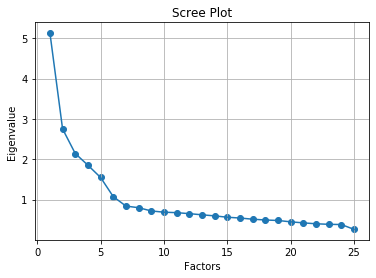

In [11]:
 # 同样的数据绘制散点图和折线图
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)

# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")

plt.grid()  # 显示网格
plt.show()  # 显示图形

從上面的圖形中，我們明確地看到：選擇5個因子是最合適的

以因素個數為X軸，未轉軸前的特徵值為Y軸所畫出的散佈圖，由研究者主觀的由圖中自行判斷一臨界點，在此臨界點以上，特徵值的變動幅度大，但在此臨界點以下，特徵值的變動幅度小，此時，就以此臨界點所對應的因素個數最為萃取因素的數目

## 建模

### 因子分析（fit）

我們選擇5個因子來進行因子分子的建模過程，同時指定矩陣旋轉方式為：

In [12]:
#選擇方式：varimax 方差集大化
#固定公共因子為5個
faa_five = FactorAnalyzer(5,rotation = "varimax")
faa_five.fit(df)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

### 查看因子方差-get_communalities()

上面執行fit建模後，我們查看每個因子的方差，使用方法：get_communalities()

In [13]:
#公因子方差
faa_five.get_communalities()
# 每個變量的公因子方差數據
pd.DataFrame(faa_five.get_communalities(),index=df.columns)

,0
A1,0.203905
A2,0.462803
A3,0.539692
A4,0.301905
A5,0.470020
C1,0.348395
C2,0.453872
C3,0.324289
C4,0.476699
C5,0.435383


### 查看特征值-get_eigenvalues

查看變量的特徵值：

In [14]:
# 查看特征值-get_eigenvalues
faa_five.get_eigenvalues()
pd.DataFrame(faa_five.get_eigenvalues())

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,5.134311,2.751887,2.142702,1.852328,1.548163,1.073582,0.839539,0.799206,0.718989,0.688089,...,0.543305,0.514518,0.494503,0.482640,0.448921,0.423366,0.400671,0.387804,0.381857,0.262539
1,4.599606,2.268086,1.548737,1.218379,0.955671,0.459050,0.238122,0.190832,0.100098,0.087433,...,-0.054093,-0.060523,-0.077273,-0.087402,-0.104485,-0.118911,-0.123542,-0.140463,-0.153363,-0.177237


### 查看成分矩阵-loadings

現在有25個變量，5個隱藏變量（因子），查看它們構成的成分矩陣：

如果轉成DataFrame格式，index就是我們的25個變量，columns就是指定的5個因子factor。轉成DataFrame格式後的數據：

In [15]:
pd.DataFrame(faa_five.loadings_,index=df.columns)

,0,1,2,3,4
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
C5,0.290318,-0.176395,-0.562467,-0.047525,0.036822


### 查看因子贡献率-get_factor_variance()

通過理論部分的解釋，我們發現每個因子都對變量有一定的貢獻，存在某個貢獻度的值，在這裡查看3個和貢獻度相關的指標：

* 總方差貢獻：variance (numpy array) – The factor variances
* 方差貢獻率：proportional_variance (numpy array) – The proportional factor variances
* 累積方差貢獻率：cumulative_variances (numpy array) – The cumulative factor variances


In [16]:
pd.DataFrame(faa_five.get_factor_variance())

,0,1,2,3,4
0,2.709633,2.473090,2.041106,1.844498,1.522153
1,0.108385,0.098924,0.081644,0.073780,0.060886
2,0.108385,0.207309,0.288953,0.362733,0.423619


### 隱藏變量可視化並繪圖

為了更直觀地觀察每個隱藏變量和哪些特徵的關係比較大，進行可視化展示，為了方便取上面相關係數的絕對值：

In [17]:
df1 = pd.DataFrame(np.abs(faa_five.loadings_),index=df.columns)
df1

,0,1,2,3,4
A1,0.111126,0.040465,0.022798,0.428166,0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,0.066476,0.204566,0.230584,0.435624,0.112700
A5,0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,0.030855,0.023907,0.557036,0.111578,0.005183
C4,0.240410,0.064984,0.633806,0.037498,0.107535
C5,0.290318,0.176395,0.562467,0.047525,0.036822


然後我們通過熱力圖將係數矩陣繪製出來：

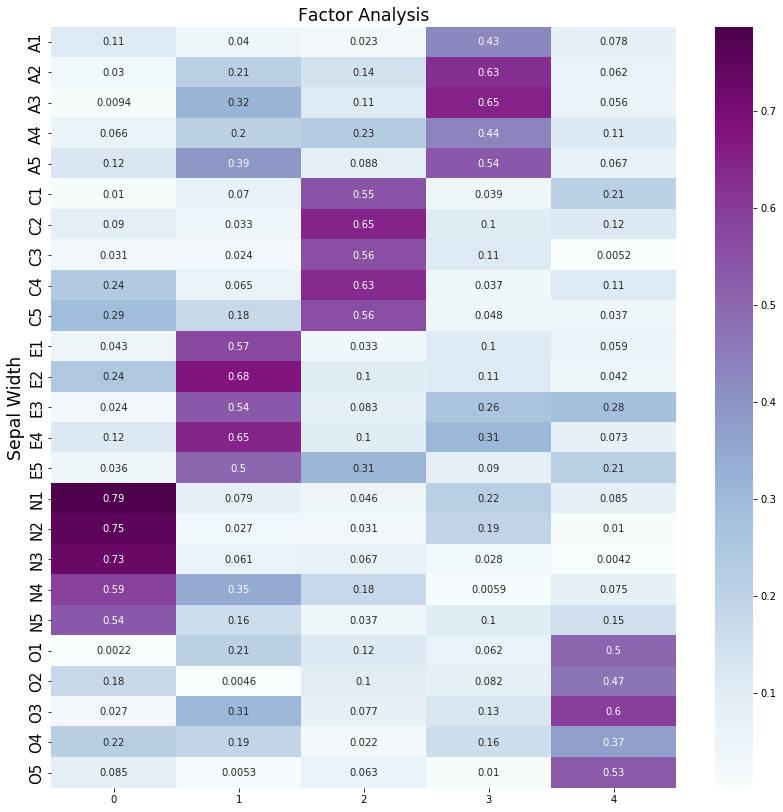

In [18]:
# 绘图

plt.figure(figsize = (14,14))
ax = sns.heatmap(df1, annot=True, cmap="BuPu")

# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")

# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()

# 保存图片
# plt.savefig("factorAnalysis", dpi=500)

### 转成新变量-transformn

上面我們已經知道了5個因子比較合適，可以將原始數據轉成5個新的特徵，具體轉換方式為：

In [ ]:
df2 = pd.DataFrame(faa_five.transform(df))
df2

轉成DataFrame格式後數據展示效果更好：仍然是2436條數據，5個特徵（新特徵）

=========================================================================================================

# My Data

## 套件導入

In [1]:
# 数据处理
import pandas as pd
import numpy as np

# 绘图
import seaborn as sns
import matplotlib.pyplot as plt
# 因子分析
from factor_analyzer import FactorAnalyzer

## 資料輸入 and 預處理

In [2]:
df_my = pd.read_csv("103-two_compare.csv")#, index_col=0).reset_index(drop=True)

In [3]:
df_test = df_my.groupby(["地區"]).出生年次.describe()
df_my['year'] = df_my['地區'].map(dict(zip(df_test.index,df_test['mean'])))
fliter1 = (df_my['出生年次'] > df_my["year"]) #年長 df[fliter1]
fliter2 = (df_my['出生年次'] < df_my["year"]) #年幼 df[fliter2]
fliter3 = (df_my['出生年次'] == df_my["year"]) #同年 df[fliter3]
df_my

,地區,村里碼,姓名,號次,性別,出生年次,推薦政黨,得票數,得票率,當選註記,是否現任,編碼,學歷,經歷,政見,year
0,南投縣南投市平和里,12,謝清輝,1,男,1950,無黨籍及未經政黨推薦,1883,0.5122,1,是,370401121,南投市平和國小\n中興國中\n私立宜寧高中機工科畢業夜校,1、南投市平和里第17、18 、19屆里長\n2、中宏有限公司課長\n3、南投縣總上會上級代...,一、維持專責呈長邢秤，為呈民服務，做好呈政事務。\n二、繼續關懷弱勢族群，辦受理老人、屮低收...,1950.5
1,南投縣南投市平和里,12,曾聰明,2,男,1951,無黨籍及未經政黨推薦,1793,0.4877,0,否,370401122,南投市平和國小\n陸軍第二士官學校,天明宮主任委員\n平和社區發展協會理事,熱心為里社區爭福利\n為守望相助爭福利\n認真服務里民,1950.5
2,南投縣南投市三和里,16,謝銘津,1,男,1951,無黨籍及未經政黨推薦,959,0.4892,0,否,370401161,南投國小\n南投初中\n陸軍第一士校高中畢業,重興建材行。\n南投縣建材公會理事長。\n南投縣謝姓宗親會理事長。\n南投市三和社區發展協會...,一專職服務，認真工作，建設里社區。\n二燈要亮，路要平，水要通及增設防盜系統。\n三、關心婦...,1956.0
3,南投縣南投市三和里,16,吳志鵬,2,男,1961,無黨籍及未經政黨推薦,1001,0.5107,1,是,370401162,南投國小\n南投國中\n國立南投高商,現任里長\n南投市農會農事小組長\n南投市農會代表\n南投市農會理事\n南投市義消分隊隊員\...,1 、推行政令、反映民意。\n2 、推動里民文康、休閒自強活動促進里民感情。\n3 、代辦各...,1956.0
4,南投縣南投市嘉興里,17,張燈示,1,男,1954,無黨籍及未經政黨推薦,522,0.3546,0,否,370401171,嘉和國小\n南投高中初級部\n沙鹿高工畢業,一、南投市後備軍人輔導中心輔導員\n二、南投國際青年商會會員、OB會友。\n三、彰化汽車客運...,一、提昇里民耕作農作物、園藝、栽植管理知識，不定期聘請專業人員授課講習、期使本少利多效率·\...,1954.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,雲林縣水林鄉大溝村,14,李聯勝,2,男,1942,無黨籍及未經政黨推薦,431,0.5561,1,是,370520142,嘉義高農肄業。,水林鄉第十七、十八、十九當選大溝村長。,服務村民為目的。,1953.5
7404,雲林縣水林鄉松北村,18,陳永祥,1,男,1953,無黨籍及未經政黨推薦,564,0.7203,1,是,370520181,蔦松國小畢業。,松北村第16屆村長。松北村第19屆村長。,"一、全心全力為村民服務。二、主動認真勤快爭取地方建設。三、加強美綠化工程,改善居民居住品質及環境。",1953.0
7405,雲林縣水林鄉松北村,18,黃永成,2,男,1953,無黨籍及未經政黨推薦,219,0.2796,0,否,370520182,蔦松國小畢業。,蔦松國小42屆家長會長。,一、爭取村內農水路。二、爭取老人弱勢福利。三、爭取社區老人福利。,1953.0
7406,雲林縣水林鄉溪墘村,24,蔡錦明,1,男,1951,無黨籍及未經政黨推薦,325,0.4887,0,否,370520241,和安國小。,15、16、17農會代表。,一、服務村民。二、水道路修護。三、整理環境衛生。四、關心老人與福利。五、促進社區發展。,1955.0


In [4]:
# 男=1 女=0 
df_my['性別'].replace("男",1,inplace=True)
df_my['性別'].replace("女",0,inplace=True)
# 有政黨=1 無政黨=0
df_my['推薦政黨'].replace(['中國國民黨', '民主進步黨','台灣團結聯盟','人民民主陣線','親民黨','中華統一促進黨','無黨團結聯盟','新黨'],1,inplace=True)
df_my['推薦政黨'].replace('無黨籍及未經政黨推薦',0,inplace=True)
# 現任=1 無現任=0
df_my['是否現任'].replace("是",1,inplace=True)
df_my['是否現任'].replace("否",0,inplace=True)
# 年長=2 年幼=1 同歲=0
df_my.loc[fliter1,'年紀'] = 2
df_my.loc[fliter2,'年紀'] = 1
df_my.loc[fliter3,'年紀'] = 0

In [5]:
# 拿掉非討論條件 
df_my.drop(columns=['地區','村里碼','姓名','出生年次','得票數','得票率','編碼','學歷','經歷','政見','year'],inplace=True)
df_my

,號次,性別,推薦政黨,當選註記,是否現任,年紀
0,1,1,0,1,1,1.0
1,2,1,0,0,0,2.0
2,1,1,0,0,0,1.0
3,2,1,0,1,1,2.0
4,1,1,0,0,0,1.0
...,...,...,...,...,...,...
7403,2,1,0,1,1,1.0
7404,1,1,0,1,1,0.0
7405,2,1,0,0,0,0.0
7406,1,1,0,0,0,1.0


In [6]:
# 改英文
df_my.rename(columns={'號次':'Number','性別':'Gender','推薦政黨':'PartyMembership','當選註記':'Elected note','是否現任':'continue or not','年紀':'Age'},inplace=True)
df_my

,Number,Gender,PartyMembership,Elected note,continue or not,Age
0,1,1,0,1,1,1.0
1,2,1,0,0,0,2.0
2,1,1,0,0,0,1.0
3,2,1,0,1,1,2.0
4,1,1,0,0,0,1.0
...,...,...,...,...,...,...
7403,2,1,0,1,1,1.0
7404,1,1,0,1,1,0.0
7405,2,1,0,0,0,0.0
7406,1,1,0,0,0,1.0


In [14]:
df_my.to_csv("factor.csv",index=False)

## 充分性檢測

In [35]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(df_my)
chi_square_value, p_value

(1251.5349634797242, 1.3858452383888343e-257)

In [36]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_my)
kmo_all

array([0.60232224, 0.50776288, 0.58008043, 0.49552556, 0.5028275 ,
       0.42901588])

In [37]:
kmo_model

0.5021651823861478

In [38]:
faa = FactorAnalyzer(6,rotation=None)
faa.fit(df_my)

# 得到特征值ev、特征向量v
ev,v=faa.get_eigenvalues()

In [39]:
ev

array([1.41066004, 1.07725158, 1.01596101, 0.98136289, 0.88310024,
       0.63166423])

In [40]:
v

array([ 7.99151017e-01,  2.75753304e-01,  1.41125861e-01,  2.39036777e-02,
        1.02166035e-02, -1.94116178e-06])

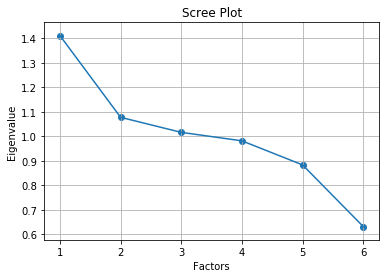

In [41]:
 # 同样的数据绘制散点图和折线图
plt.scatter(range(1, df_my.shape[1] + 1), ev)
plt.plot(range(1, df_my.shape[1] + 1), ev)

# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")

plt.grid()  # 显示网格
plt.show()  # 显示图形

## 建模

In [7]:
#選擇方式：varimax 方差集大化
#固定公共因子為5個
faa_five = FactorAnalyzer(1,rotation = "varimax")
faa_five.fit(df_my)

/home/coco31429/.local/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:656: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


FactorAnalyzer(n_factors=1, rotation='varimax', rotation_kwargs={})

In [8]:
#公因子方差
faa_five.get_communalities()
# 每個變量的公因子方差數據
pd.DataFrame(faa_five.get_communalities(),index=df_my.columns)

,0
Number,0.000808
Gender,0.003252
PartyMembership,0.029012
Elected note,0.096706
continue or not,0.997697
Age,0.011784


In [9]:
pd.DataFrame(faa_five.get_eigenvalues())

,0,1,2,3,4,5
0,1.410660,1.077252,1.015961,0.981363,0.883100,0.631664
1,1.141623,0.107672,0.039393,-0.009854,-0.025029,-0.114545


In [10]:
pd.DataFrame(faa_five.loadings_,index=df_my.columns)

,0
Number,0.028427
Gender,0.057030
PartyMembership,0.170328
Elected note,0.310977
continue or not,0.998848
Age,-0.108556


In [11]:
pd.DataFrame(faa_five.get_factor_variance())

,0
0,1.139260
1,0.189877
2,0.189877


In [12]:
df_my1 = pd.DataFrame(np.abs(faa_five.loadings_),index=df_my.columns)
df_my1

,0
Number,0.028427
Gender,0.057030
PartyMembership,0.170328
Elected note,0.310977
continue or not,0.998848
Age,0.108556


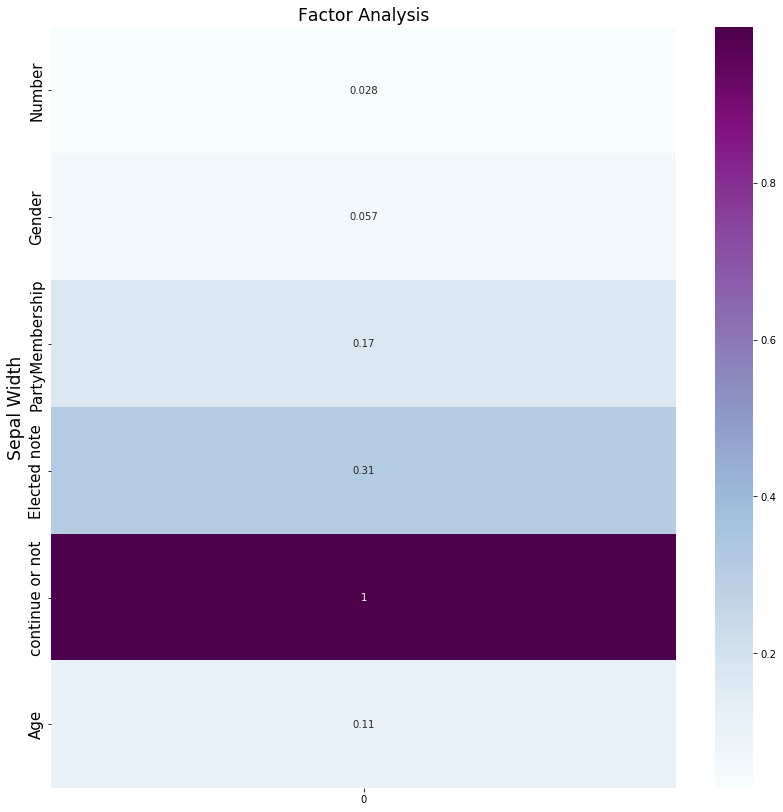

In [13]:
# 绘图

plt.figure(figsize = (14,14))
ax = sns.heatmap(df_my1, annot=True, cmap="BuPu")

# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")

# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()

# 保存图片
# plt.savefig("factorAnalysis", dpi=500)